<h2 align="center">Optimization of Physical Form Under Uncertainty</h2>

<h3 align="center">Dave Brown and Sunil Kurup</h3>

** Introduction **

We will investigate a method of optimizing the shape of a 2D piece of fabric that will wrap a 3D object.  Specifically we aim to generate the pattern for a fabric shirt with a fit tailored to a specific body.  The measurements of the body are assumed to have a normally distributed error, typical with any manual measuring process.  The density and elasticity of the fabric are also assumed to be known only with error.  We use a mass-spring model of the fabric to generate the drap profile on the body and calculate a fit score that we will use as the utility for the optimization.  The first pass of the utility score will be based on the tension in the mass-spring model (too much tension is too tight), but additional heuristics may prove useful to get a good shirt fit.

We plan to use a genetic algorithm or simulated annealing to find the ideal fabric shape for a set of parameters.  In order to determine the probability density function (PDF) of optimal shapes from the entire space of our noisy parameters we will use a monte carlo method. 

To demonstrate success of the method we will visualize the most-likely optimal fit in its 3D form and the PDF of optimal fits in a heatmap overlaid on the 2D form.  We will consider realizing the most-likely fit as an actual garment, but our sewing skills are woefully lacking, and will likely prevent that.

This problem has been considered before, but without the uncertainty.  It has useful applications for creating optimized structures with advanced composite materials [1].  


Part of the optimization requires modeling cloth.  The physical simulation of fabric has an extensive body literature, often intertwined with the computer graphics field.  We only cite a small sample of this work, but think [2],[3], [4] and [5] are relevant to our own project.


** Solid body model **

In [9]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.image as image
import pandas as pd
import random
import math
import time
import stl
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from stl_tools import numpy2stl



len x:28868 len y:28868
(28868L, 3L)


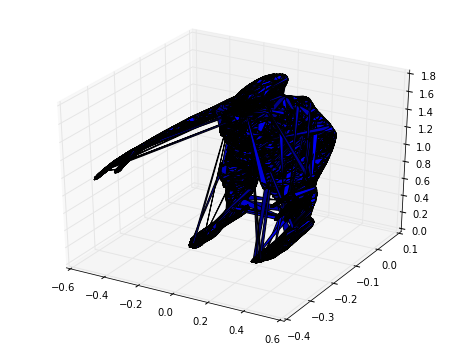

In [41]:
# from stlparser
def getNormalLine(origin, vector, scale=1.0):
    """
    Returns a plottable line represented by a 3-tuple where each element is an array
    for a single axis. First element is all x-coordinates, second is all y-coordinates, etc...
    """
    vector = np.array(vector) * scale
    endpoint = tuple([sum(el) for el in zip(origin, vector)])
    return tuple([np.linspace(start, stop, 10) for start, stop in zip(origin, endpoint)])

def getTriangleCentroid(triangle):
    """
    Returns the centroid of a triangle in 3D-space
    """
    # group the xs, ys, and zs
    coordGroups = zip(triangle[0], triangle[1], triangle[2])
    centroid = tuple([sum(coordGroup)/3.0 for coordGroup in coordGroups])
    return centroid

dataFolder = "/am207/project/data/"
msh = stl.mesh.Mesh.from_file(dataFolder + 'male_b.stl')
fig = plt.figure(figsize=(8,6))
ax = fig.gca(projection='3d')
print "len x:" + str(len(msh.x)) + " len y:" + str(len(msh.y))
print np.shape(msh.x)
#ax = fig.add_subplot(111, projection='3d')
#for i in xrange(len(msh.x)):
    #face = Poly3DCollection([(msh.x[i],msh.y[i],msh.z[i])])
    #face.set_alpha(0.5)
    #ax.add_collection3d(face)
    #centroid = getTriangleCentroid((msh.x[i],msh.y[i],msh.z[i]))
    #xs, ys, zs = getNormalLine(centroid, msh.normals[i], 10)
ax.plot_surface(msh.x, msh.y, msh.z)

plt.show()

In [6]:
dataFolder = "/am207/project/data/"


In [100]:
ig = image.imread(dataFolder + 'male.png')

In [101]:
def cloth_model(x,y,img_size_x=2048,img_size_y=2048):
    front_anchors = [(861,552),(957,519),(1011,570),(1089,522),(1182,564),(1140,825),(1170,948),(876,951), (903,813)]
    right_sleeve_anchors = [(1182,564),(1257,642),(1224,732),(1164,684)]
    left_sleeve_anchors=[(861,552),(768,651),(837,732),(873,699)]
    return cloth_model_pdf(x,y,front_anchors,right_sleeve_anchors,left_sleeve_anchors)
    
def cloth_model_pdf(x,y,front_anchors,right_sleeve_anchors,left_sleeve_anchors):
    s=0.001
    for i in xrange(len(front_anchors)):
        s = s +np.exp ( - ((front_anchors[i][0]-x)**2 + (front_anchors[i][1]-y)**2 ))
    for i in xrange(len(right_sleeve_anchors)):
        s = s +np.exp (- ((right_sleeve_anchors[i][0]-x)**2 + (right_sleeve_anchors[i][1]-y)**2 ) )
    for i in xrange(len(left_sleeve_anchors)):
        s = s +np.exp (-( (left_sleeve_anchors[i][0]-x)**2 + (left_sleeve_anchors[i][1]-y)**2 ))
    return np.log(s)

def cloth_sampler(N=10000,x_start=1024,y_start=1024,sigma=0.75):
    x=[]
    y=[]
    x0=x_start
    y0=y_start
    accepted=0
    for k in xrange(N):
        x_star = np.random.normal(x0,sigma)
        y_star = np.random.normal(y0,sigma)
        p_star = cloth_model(x_star,y_star)
        p = cloth_model(x0,y0)
        u = np.log(np.random.random())
        if u < (p_star - p):
            x0=x_star
            y0=y_star
            accepted=accepted+1
        x.append(x0)
        y.append(y0)
        
    return np.array(x),np.array(y),accepted

Acceptance rate:0.9861


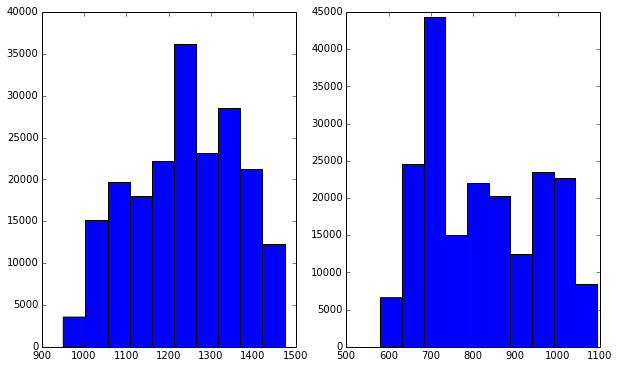

In [102]:
N=200000
xs,ys,accepted=cloth_sampler(N)
print "Acceptance rate:" + str(accepted*1./N)
plt.figure(figsize=(10,6))
plt.subplot(121)
plt.hist(xs)
plt.subplot(122)
plt.hist(ys)
plt.show()



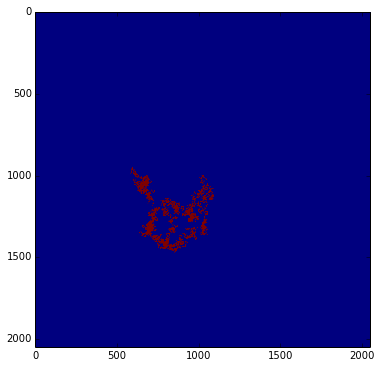

In [103]:
plt.figure(figsize=(10,6))
cloth_img = np.zeros(2048*2048).reshape(2048,2048)
for k in xrange(len(xs)):
    cloth_img[xs[k],ys[k]]=1
plt.imshow(cloth_img)

** Mass-Spring model of fabric **


In [ ]:
def mass_spring():
    pass


**Joint solid body-fabric model **

In [ ]:
def joint_pdf():
    pass

**Markov chain Sampling**

In [ ]:
def mcmc():
    pass

def hybrid_mcmc():
    pass

** Optimization **

In [ ]:
def opt():
    pass


** Results and Discussion **

** Conclusion **


** References **<br>
[1] Masaki Aono, Paolo Denti, David E Breen and Michael J Wozny “Fitting a woven cloth model to a curved surface: Dart insertion”. IEEE Computer Graphics and Applications, Vol. 16, No. 5, pp. 60-70 September 1996.<br>
[2] David Baraff and Andrew Witkin “Large steps in cloth simulation”. Computer Graphics Proceedings, Annual Conference Series: 43-54, 1998<br>
[3] Bridson, R., Marino, S. and Fedkiw, R., "Simulation of Clothing with Folds and Wrinkles", ACM SIGGRAPH/Eurographics Symposium on Computer Animation (SCA), edited by D. Breen and M. Lin, pp. 28-36, 2003.<br>
[4] Vassilev, T., Spanlang, B.: Efficient Cloth Model for Dressing Animated Virtual People, (in proc. Learning to Behave Workshop, Enschede the Netherlands), pp. 89-100, October 2000<br>
[5] Provot, X. (1995).”Deformation constraints in a mass-spring model to describe rigid cloth behaviour” In Proceedings of Graphics Interface, pages 141–155.

